# Imports

In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import numpy as np
import pandas as pd
import math
import unicodedata

matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()
plt.rc('axes', axisbelow=True)

def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue', fontsize="large")

# Communal Functions

In [2]:
def create_graph():
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(8)
    ax = f.add_subplot(1,1,1)
    return f, ax

def setup_axis(ax, xlim, ylim):
    ax.set_xlim(0,xlim)
    ax.set_ylim(0,ylim)
    ax.spines['top'].set_color("#aaaaaa")
    ax.spines['right'].set_color("#aaaaaa")
    ax.spines['left'].set(linewidth=1.2)
    ax.spines['bottom'].set(linewidth=1.2)

def setup_ticks(ax, xtick_sep, ytick_sep, major_x_tick, major_y_tick, minor_x_tick, minor_y_tick):
    ax.xaxis.set_major_locator(MultipleLocator(xtick_sep))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_major_locator(MultipleLocator(ytick_sep))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.xaxis.set_minor_formatter(minor_x_tick)
    ax.xaxis.set_major_formatter(major_x_tick)
    ax.yaxis.set_minor_formatter(minor_y_tick)
    ax.yaxis.set_major_formatter(major_y_tick)
    ax.tick_params(which='minor', width=1.2, length=4, color="#000000")
    ax.tick_params(which='major', width=1.2, length=10, color="#000000", labelsize='12')
    ax.grid(which="major", linewidth=1, color='#aaaaaa', linestyle="-", zorder=0.2)
    ax.grid(which="minor", linewidth=1, color='#dddddd', linestyle="-", zorder=0.1)
    
def setup_labels(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=20, verticalalignment='bottom')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    

# Graphs

## Half-life

In [3]:
N0        = 6e+23
dec_const = 3.8394e-12

In [4]:
def exp_decay(N0:float, dec_const: float, t: int) -> float:
    return N0 * math.exp(-1 * dec_const * t)

def half_life(dec_const: float) -> float:
    return math.log(2) / dec_const

In [5]:
# t_half = exp_decay(N0, dec_const, 5730 * 365.25 * 24 * 3600)
t_half_sec = half_life(dec_const)
t_half_yrs = t_half_sec / 3600 / 24 / 365.25
t_half_mil = t_half_yrs / 1000


print(t_half_sec)
print(t_half_yrs)
print(t_half_mil)
exp_decay(N0, dec_const, t_half_sec)

180535286909.39868
5720.8180251159365
5.720818025115936


3e+23

In [6]:
# the tick functions for the next two graphs

def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x  / 1000)}"


def major_y_tick(y, pos):
    if math.isclose(6e+23, y):
        return "6"
    else:
        return f"{int(y  / 1e+23)}"
    

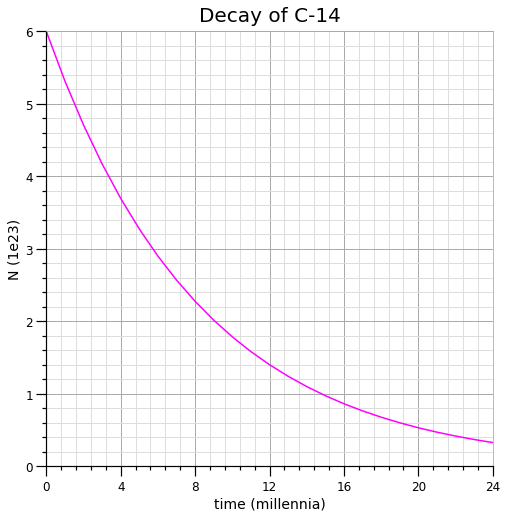

In [7]:
f, ax = create_graph()
setup_axis(ax, 24e+3, 6e+23)

setup_ticks(ax, 4000, 1e+23, major_x_tick, major_y_tick, minor_x_tick, minor_y_tick)
setup_labels(ax, "Decay of C-14", "time (millennia)", "N (1e23)")

t_vals = np.arange(25) * 1000
N_vals = [exp_decay(N0, dec_const, i * 365.25 * 24 * 3600) for i in t_vals]
ax.plot(t_vals, N_vals, color="magenta")

plt.savefig("./images/c-14_decay.png", facecolor="#ffffff")

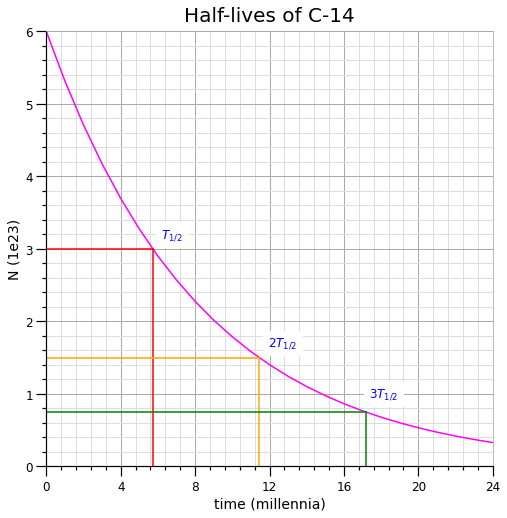

In [8]:
f, ax = create_graph()
setup_axis(ax, 24e+3, 6e+23)
setup_ticks(ax, 4000, 1e+23, major_x_tick, major_y_tick, minor_x_tick, minor_y_tick)
setup_labels(ax, "Half-lives of C-14", "time (millennia)", "N (1e23)")

t_vals = np.arange(25) * 1000
N_vals = [exp_decay(N0, dec_const, i * 365.25 * 24 * 3600) for i in t_vals]
ax.plot(t_vals, N_vals, color="magenta")
ax.plot([0, t_half_yrs], [exp_decay(N0, dec_const, t_half_sec), exp_decay(N0, dec_const, t_half_sec)], color="red")
ax.plot([t_half_yrs, t_half_yrs], [exp_decay(N0, dec_const, t_half_sec), 0], color="red")
ax.plot([0, t_half_yrs * 2], [exp_decay(N0, dec_const, t_half_sec) / 2, exp_decay(N0, dec_const, t_half_sec) / 2], color="orange")
ax.plot([t_half_yrs * 2, t_half_yrs * 2], [exp_decay(N0, dec_const, t_half_sec) / 2, 0], color="orange")
ax.plot([0, t_half_yrs * 3], [exp_decay(N0, dec_const, t_half_sec) / 4, exp_decay(N0, dec_const, t_half_sec) / 4], color="green")
ax.plot([t_half_yrs * 3, t_half_yrs * 3], [exp_decay(N0, dec_const, t_half_sec) / 4, 0], color="green")
text(6.75e3, 3.3e23, "$T_{1/2}$")
text(12.7e3, 1.8e23, "$2T_{1/2}$")
text(18.15e3, 1.1e23, "$3T_{1/2}$")
plt.savefig("./images/c-14_t_half.png", facecolor="#ffffff")

## Nuclear Stability

The first section here was written by a professional scientist.

In [9]:
def SEMF(Z, N):
    """Calculate the average binding energy per nucleon for nucleus Z, N.

    Calculate the average nuclear binding energy per nucleon for a nucleus
    with Z protons and N neutrons, using the semi-empirical mass formula and
    parameters of J. W. Rohlf, "Modern Physics from alpha to Z0", Wiley (1994).

    Z and N can be NumPy arrays or scalar values.

    """

    # The parameterization of the SEMF to use.
    aV, aS, aC, aA, delta = 15.75, 17.8, 0.711, 23.7, 11.18

    # Covert Z and N to NumPy arrays if they aren't already
    Z, N = np.atleast_1d(Z), np.atleast_1d(N)
    # Total number of nucleons
    A = Z + N

    # The pairing term is -delta for Z and N both odd, +delta for Z and N both
    # even, and 0 otherwise. Create an array of the sign of this term so that
    # we can vectorize the calculation across the arrays Z and N.
    sgn = np.zeros(Z.shape)
    sgn[(Z%2) & (N%2)] = -1
    sgn[~(Z%2) & ~(N%2)] = +1

    # The SEMF for the average binding energy per nucleon.
    E = (aV - aS / A**(1/3) - aC * Z**2 / A**(4/3) -
         aA * (A-2*Z)**2/A**2 + sgn * delta/A**(3/2))

    # Return E as a scalar or array as appropriate to the input Z.
    if Z.shape[0] == 1:
        return float(E)
    return E

# Read the experimental data into a Pandas DataFrame.
df = pd.read_fwf('data/mass.mas03', usecols=(2,3,4,11),
              names=('N', 'Z', 'A', 'avEbind'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the avEbind column won't be numeric. Coerce to float and drop these entries.
df['avEbind'] = pd.to_numeric(df['avEbind'], errors='coerce')
df = df.dropna()
# Also convert from keV to MeV.
df['avEbind'] /= 1000

# Group the DataFrame by nucleon number, A.
gdf = df.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
maxavEbind = gdf.apply(lambda t: t[t.avEbind==t.avEbind.max()])

# Add a column of estimated binding energies calculated using the SEMF.
maxavEbind['Eapprox'] = SEMF(maxavEbind['Z'], maxavEbind['N'])

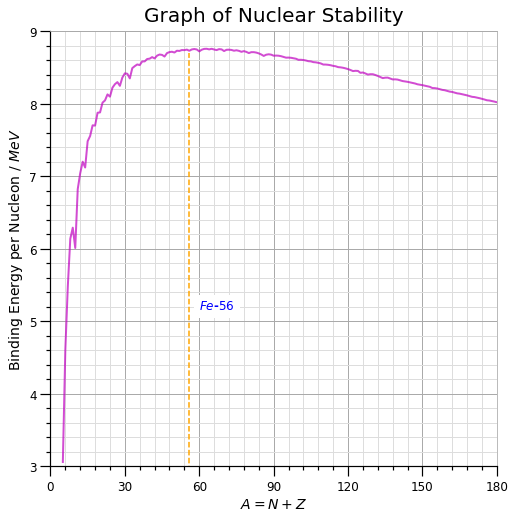

In [10]:
f, ax = create_graph()
setup_axis(ax, 1,1)
## IMPORTANT: overide the x and y lim directly for this graph only
ax.set_ylim(3, 9)
ax.set_xlim(0, 180)


def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x)}"


def major_y_tick(y, pos):
    return f"{int(y)}"


setup_ticks(ax, 30, 1, major_x_tick, major_y_tick, minor_x_tick, minor_y_tick)
setup_labels(ax, "Graph of Nuclear Stability", '$A = N + Z$', 'Binding Energy per Nucleon / $MeV$')

ax.plot(maxavEbind['A'], maxavEbind['Eapprox'], alpha=0.7, lw=2, c='m',label='SEMF')
ax.plot([56, 56], [0, 8.7], color="orange", linestyle="--")
text(67, 5.3, "$Fe$-$56$")
plt.savefig("./images/nuclear_stability.png", facecolor="#ffffff")

## Gravitational Field Strength

radius of earth: 6.37e6
mass of earth: 5.98e24

In [11]:
earth_r = 6370000
earth_m = 5.98e24

def sphere_v(r: float) -> float:
    return (4/3) * math.pi * r**3

def density(m: float, v: float) -> float:
    return m / v

earth_v = sphere_v(earth_r)
earth_p = density(earth_m, earth_v)

print("mass: ", earth_m)
print("radius: ", earth_r)
print("volume: ", earth_v)
print("density: ", earth_p)

mass:  5.98e+24
radius:  6370000
volume:  1.0826969324300023e+21
density:  5523.244613410425


In [12]:
G = 6.67e-11

def F(m_1: float, m_2:float, r: float) -> float:
    return G * ((m_1 * m_2) / r**2)

def g(M: float, r: float) -> float:
    return G * (M / r**2)

def g_planet(M: float, R: float, P: float, r: float) -> float:
    if r >= R:
        return (g(M, R) * R**2)/(r**2)
    else: 
        return 0 if r == 0 else g((P * sphere_v(r)), r)
    
def V(M: float, r: float):
    return -1 * (G * M) / r
        

In [13]:
r_vals_1 = np.linspace(0, earth_r, 200)
r_vals_2 = np.linspace(earth_r, earth_r*6, 800)
g_vals_1 = [g_planet(earth_m, earth_r, earth_p, i) for i in r_vals_1]
g_vals_2 = [g_planet(earth_m, earth_r, earth_p, i) for i in r_vals_2]

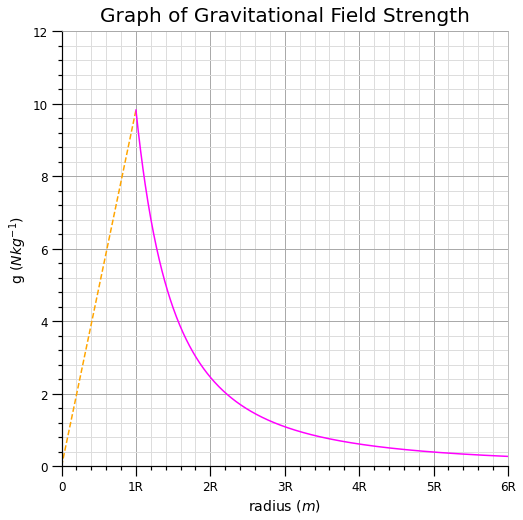

In [14]:
f, ax = create_graph()
setup_axis(ax, 6 * earth_r, 12)


def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x / earth_r)}R" if x != 0 else "0"


def major_y_tick(y, pos):
    return f"{int(y)}"


setup_ticks(ax, earth_r, 2, major_x_tick, major_y_tick, minor_x_tick, minor_y_tick)
setup_labels(ax, "Graph of Gravitational Field Strength", 'radius ($m$)', 'g ($Nkg^{-1}$)')

ax.plot(r_vals_1, g_vals_1, color="orange", linestyle="--")
ax.plot(r_vals_2, g_vals_2, color="magenta", linestyle="-")

plt.savefig("./images/gravitational_field_strength.png", facecolor="#ffffff")

In [15]:
print(V(earth_m, earth_r))

-62616326.53061225


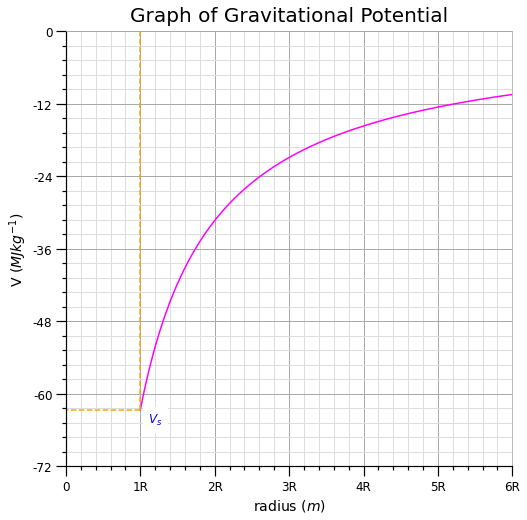

In [16]:
f, ax = create_graph()
setup_axis(ax, 6 * earth_r, -72)
## IMPORTANT: overide the y lim directly for this graph only
ax.set_ylim(-72, 0)


# tick marks
def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x / earth_r)}R" if x != 0 else "0"


def major_y_tick(y, pos):
    return f"{int(y)}"


setup_ticks(ax, earth_r, 12, major_x_tick, major_y_tick, minor_x_tick, minor_y_tick)
setup_labels(ax, "Graph of Gravitational Potential", 'radius ($m$)', 'V ($MJkg^{-1}$)')

r_vals = np.linspace(earth_r, earth_r*6, 800)
V_vals = [V(earth_m, i) / 1000000 for i in r_vals]
ax.plot(r_vals, V_vals, color="magenta", linestyle="-")
ax.plot([earth_r, earth_r], [ V_vals[0],0], color="orange", linestyle="--")
ax.plot([earth_r, 0], [ V_vals[0], V_vals[0]], color="orange", linestyle="--")
text(earth_r + earth_r * 0.2, -63, "$V_s$")
plt.savefig("./images/gravitational_potential.png", facecolor="#ffffff")

## Photoelectric Effect

Using data for zinc.

In [17]:
phi = 6.928e-19
h = 6.62607004e-34
f_min = phi / h

def ke_max(f):
    return h * f - phi

print(ke_max(0))

-6.928e-19


In [18]:
f_vals = np.linspace(0, 18e14, 800)
ke_vals = np.array([ke_max(i) for i in f_vals])
ke_vals /= 1e-19
f_vals /= 1e14

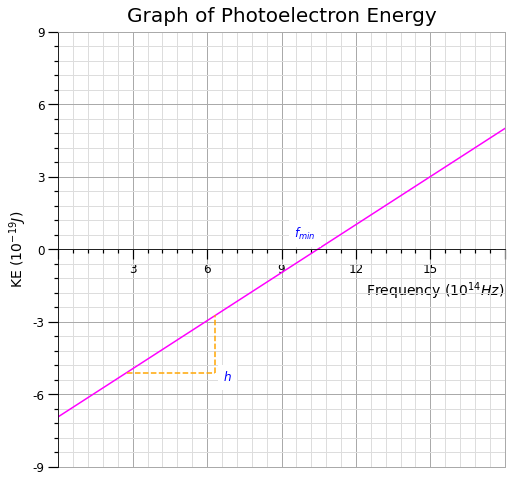

In [26]:
f, ax = create_graph()
## IMPORTANT: this graph is a little different
ax.set_xlim(0, 18)
ax.set_ylim(-9,9)
ax.spines['top'].set_color("#aaaaaa")
ax.spines['right'].set_color("#aaaaaa")


# tick marks
def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return "" if x == 0 or x ==18 else f"{int(x)}" 


def major_y_tick(y, pos):
    return f"{int(y)}"


setup_ticks(ax, 3, 3, major_x_tick, major_y_tick, minor_x_tick, minor_y_tick)


ax.spines['bottom'].set_position('zero')
ax.patch.set_edgecolor('#aaaaaa')
ax.patch.set_linewidth('1')

ax.plot(f_vals, ke_vals, color="magenta")
text(9.92, 1, "$f_{min}$")

ax.plot([2.75, 6.3],[-5.1, -5.1], color="orange", linestyle="--")
ax.plot([6.3, 6.3],[-5.1, -2.7], color="orange", linestyle="--")
text(6.8, -5.0, "$h$")


ax.set_xlabel(r'Frequency ($10^{14}Hz$)', loc="right", fontsize='14')
ax.set_ylabel(r'KE ($10^{-19}J$)', fontsize='14')

ax.set_title("Graph of Photoelectron Energy", fontsize=20, verticalalignment='bottom')
plt.savefig("./images/photoelectron_energy.png", facecolor="#ffffff")


## Capacitance

In [20]:
C = 1480

def V_to_Q(V: float) -> float:
    return C * V

V_vals = np.linspace(0, 1.8, 2000)
Q_vals = np.array([V_to_Q(i) for i in V_vals])

Q_vals




array([0.00000000e+00, 1.33266633e+00, 2.66533267e+00, ...,
       2.66133467e+03, 2.66266733e+03, 2.66400000e+03])

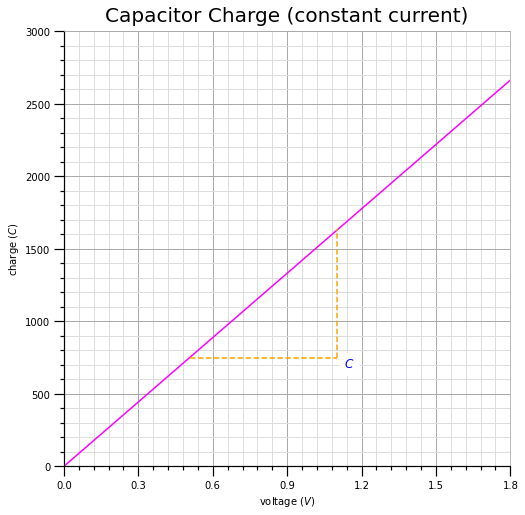

In [21]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
ax = f.add_subplot(1,1,1)


ax.spines['top'].set_color("#aaaaaa")
ax.spines['right'].set_color("#aaaaaa")
ax.spines['left'].set(linewidth=1.2)
ax.spines['bottom'].set(linewidth=1.2)

ax.set_ylim(0, 3000)
ax.set_xlim(0, 1.8)


# tick marks
def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{x:.1f}"


def major_y_tick(y, pos):
    return f"{int(y)}"


ax.xaxis.set_major_locator(MultipleLocator(0.3))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_formatter(minor_x_tick)
ax.xaxis.set_major_formatter(major_x_tick)
ax.yaxis.set_minor_formatter(minor_y_tick)
ax.yaxis.set_major_formatter(major_y_tick)

ax.tick_params(which='minor', width=1.2, length=4, color="#000000")
ax.tick_params(which='major', width=1.2, length=10, color="#000000")
ax.grid(which="major", linewidth=1, color='#aaaaaa', linestyle="-")
ax.grid(which="minor", linewidth=1, color='#dddddd', linestyle="-")

ax.plot(V_vals, Q_vals, color="magenta")
ax.plot([0.51, 1.1],[750, 750], color="orange", linestyle="--")
ax.plot([1.1, 1.1],[750, 1640], color="orange", linestyle="--")
text(1.15, 750, "$C$")

ax.set_xlabel(r'voltage $(V)$')
ax.set_ylabel(r'charge $(C)$')

ax.set_title("Capacitor Charge (constant current)", fontsize=20, verticalalignment='bottom')
plt.savefig("./images/capacitor_charge_constant_current.png", facecolor="#ffffff")

In [22]:
def import_data(path):
    """Load data from csv file into 2d array and return to call site"""
    data = []
    with open(path, "r") as file:
        file_handle = csv.reader(file)
        for row in file_handle:
            numeric_data = [float(i) for i in row]
            data.append(numeric_data)
    return data


def average_repeats(repeats):
    """Average the repeat readings of volume taken during the experiment"""
    return sum(repeats) / len(repeats)


RESISTANCE = 68000
CAPACITANCE = 2200e-6
NUM_READINGS = 90

raw_data = import_data("./data/capacitor.csv")
t = [point[0] for point in raw_data]
vt1 = [point[1] for point in raw_data]
vt2 = [point[2] for point in raw_data]
vt3 = [point[3] for point in raw_data]
vtm = [average_repeats(point[1:]) for point in raw_data]
inv_vtm = np.array([vtm[0] - i for i in vtm])
Q = np.array([CAPACITANCE * i for i in vtm])
T = RESISTANCE * CAPACITANCE
T


149.60000000000002

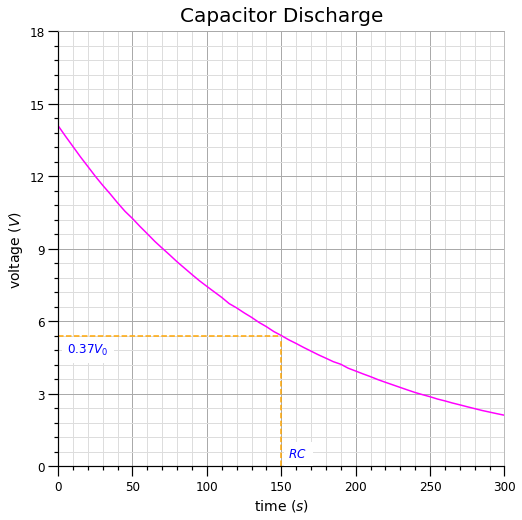

In [23]:
f, ax = create_graph()
setup_axis(ax, 300, 18)


def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x)}"


def major_y_tick(y, pos):
    return f"{int(y)}"


setup_ticks(ax, 50, 3, major_x_tick, major_y_tick, minor_x_tick, minor_y_tick)
ax.plot(t, vtm, color="magenta")
ax.plot([0, 150], [5.4, 5.4], color="orange", linestyle="--")
ax.plot([150, 150], [0,0.37 * vtm[0]], color="orange", linestyle="--")
text(20, 5.15, "$0.37V_0$")
text(161, 0.8, "$RC$")
setup_labels(ax, "Capacitor Discharge", 'time $(s)$', 'voltage $(V)$')
plt.savefig("./images/capacitor_exp_discharge.png", facecolor="#ffffff")

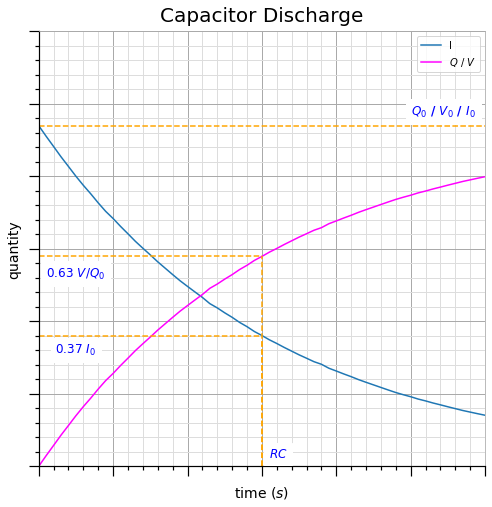

In [24]:
f, ax = create_graph()
setup_axis(ax, 300, 18)


def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f""


def major_y_tick(y, pos):
    return f""


setup_ticks(ax, 50, 3, major_x_tick, major_y_tick, minor_x_tick, minor_y_tick)
ax.plot(t, vtm, label="I")
ax.plot(t, inv_vtm,  color="magenta", label="$Q$ / $V$")
ax.plot([0, 150], [5.4, 5.4], color="orange", linestyle="--")
ax.plot([0, 150], [8.7, 8.7], color="orange", linestyle="--")
ax.plot([150, 150], [0,0.37 * vtm[0]], color="orange", linestyle="--")
ax.plot([150, 150], [0,8.7], color="orange", linestyle="--")
ax.plot([0, 300], [vtm[0], vtm[0]], color="orange", linestyle="--")
text(25, 5.13, "$0.37$ $I_0$")
text(25, 8.3, "$0.63$ $V/Q_0$")
text(161, 0.78, "$RC$")
text(272, 15, "$Q_0$ / $V_0$ / $I_0$")
setup_labels(ax, "Capacitor Discharge", 'time $(s)$', 'quantity')
ax.legend()
plt.savefig("./images/capacitor_exp_charge.png", facecolor="#ffffff")

## Thermal Physics